In [1]:
using Plots
pyplot()

Plots.PyPlotBackend()

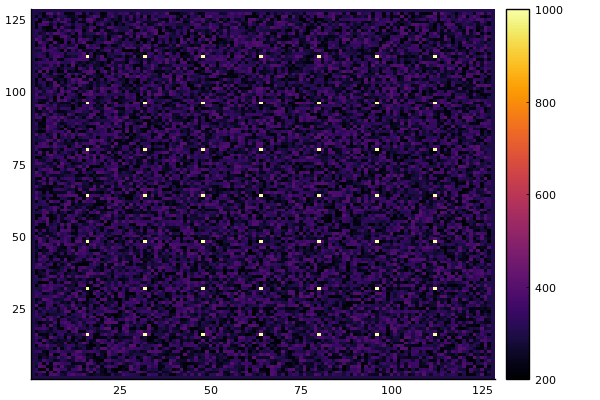

In [11]:
plate_length = 128
max_iter_time = 10

alpha = 1
delta_x = 1
delta_t = (delta_x ^ 2)/(4 * alpha)
gamma = (alpha * delta_t) / (delta_x ^ 2)

# Initialize solution: the grid of u(k, i, j)
u = rand(200:400,plate_length, plate_length)

# Boundary conditions
u_top = 300.0
u_left = 300.0
u_bottom = 300.0
u_right = 300.0
lin = range(16, plate_length-16, step=16)

x = lin'.* ones(7)
y = ones(7)'.* lin

x,y = convert(Array{Int32}, x), convert(Array{Int32}, y)
x,y = vec(x), vec(y)

# Set the initial condition
u[x,y] .= 1000

# Set the boundary conditions
u[1, :] .= u_top
u[:, end] .= u_left
u[end, :] .= u_bottom
u[:, 1] .= u_right

u = convert(Matrix{Float64}, u)
heatmap(u)

In [18]:
function calculate(u, max_iter_time)
    println("Start calculation")
    for k = 1:max_iter_time
        for i= 2:(plate_length-1)
            for j = 2:(plate_length-1)
                u[i, j] = gamma * (u[i+1,j] + u[i-1,j] + u[i,j+1] + u[i,j-1] - 4*u[i,j]) + u[i,j]
            end
        end
        u[x, y] .= 1000.0
    end
    return u
end

calculate (generic function with 1 method)

Start calculation


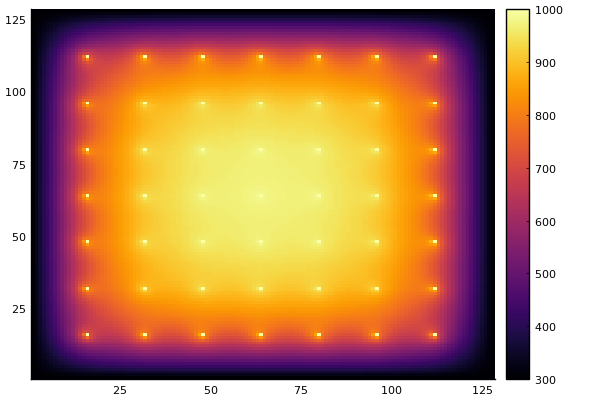

In [19]:
up = calculate(u, 1000)
#up[x,y] .= 1000.0
heatmap(up)